# Data Visualization in Python
----

# [matplotlib](https://matplotlib.org/) and pandas

pandas uses matplotlib to make plotting data sets easy.  You can also use features of matplotlib directly when plotting. We're going to use both methods below to see the differences and similarities.  The method (pandas or matplotlib) is marked for the cells so you can keep track of the different methods.

## Parts of a matplotlib plot

<img src="https://github.com/nuitrcs/pythonworkshops/raw/master/dataanalysis/visualization/plotparts.png" width=500>

<img src="https://github.com/nuitrcs/pythonworkshops/raw/master/dataanalysis/visualization/anatomy1.png" width=500>

## matplotlib documentation 

matplotlib.org

* http://matplotlib.org/users/beginner.html
* http://matplotlib.org/api/pyplot_summary.html
* http://matplotlib.org/gallery.html 

## Getting Started

Import libraries, tell the notebook to show matplotlib plots inline and make them interactive (use `%matplotlib notebook` instead for interactive plots).  Note that with interactive plots, you'll need to use plt.close() to close them afterward.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import datetime as dt
import matplotlib.dates as dates

Read in [earthquakes data](http://www.ldeo.columbia.edu/~felixw/NCAeqDD/).  It's on the large side, so it will take a minute to load.

Note that there's a bunch of extra info at the start of the file, so we'll need to skip that.  Also, some columns are combined under a single header, so we'll manually specify the header.

In [2]:
df = pd.read_csv("http://www.ldeo.columbia.edu/~felixw/NCAeqDD/NCAeqDD.v201112.1.gz", 
                 compression='gzip',
                 delim_whitespace=True, skiprows=79, na_values=[-1],
                 names=["YEAR", "MONTH", "DAY", "HOUR", "MINUTE", "SECOND",
                        "LAT", "LON", "DEP", "EH1", "EH2", "AZ", "EZ", "MAG", "ID"])
df.head(10)

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,DEP,EH1,EH2,AZ,EZ,MAG,ID
0,1984,1,1,1,19,11.317,36.08781,-120.22869,10.897,0.020,0.010,96.0,0.022,1.8,1109386
1,1984,1,1,1,58,2.420,36.87608,-120.90669,2.661,0.071,0.018,55.0,0.421,0.0,346
2,1984,1,1,1,59,27.124,36.87000,-120.90889,1.592,0.110,0.016,66.0,0.727,1.5,1109389
3,1984,1,1,2,28,4.240,37.51546,-118.75485,7.703,0.020,0.008,37.0,0.024,1.2,1109391
4,1984,1,1,3,8,58.044,40.57227,-124.55933,20.407,1.009,0.083,103.0,0.080,2.0,1109392
5,1984,1,1,3,15,36.690,37.56065,-118.84449,10.404,0.033,0.016,38.0,0.039,1.1,1109393
6,1984,1,1,4,46,38.708,38.80774,-122.84761,1.824,0.009,0.005,175.0,0.011,1.1,1109395
7,1984,1,1,5,1,53.594,36.24686,-120.39385,6.836,0.059,0.016,106.0,0.040,1.4,357
8,1984,1,1,7,8,31.986,36.49920,-121.07855,13.020,0.042,0.020,100.0,0.102,1.4,1109397
9,1984,1,1,7,17,21.373,37.54467,-118.86678,7.245,0.042,0.015,74.0,0.043,0.7,363


Let's plot magnitude vs. depth, using only the first 50 obs.  See what different options do.

Let's just plot the data frame directly to start, using pandas defaults

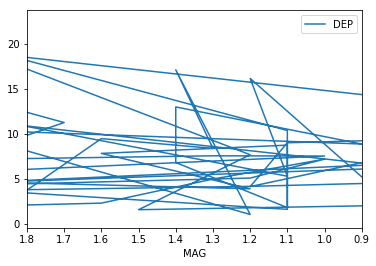

In [3]:
#pandas
df[:50].plot(x='MAG', y='DEP')

Hmm, not really what we want.  

Line plot is the default (see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html), but we can change that with the [`kind`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) parameter.  

Also note that we can omit the `<matplotlib.axes._subplots.AxesSubplot at 0x113d62898>` type output by putting a ; at the end of the plotting line

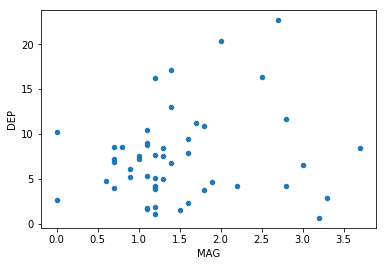

In [4]:
#pandas
df[:50].plot(x='MAG', y='DEP', kind='scatter'); # semicolon suppresses printing object info

Note that pandas conveniently gave us a default legend and axis labels.

We could also use matplotlib directly.  `plt` is the shortcut for `matplotlib.pyplot` that we imported above.  See https://matplotlib.org/api/pyplot_api.html.  `plot` will make a line plot.  We use the `scatter` function for a scatter plot.

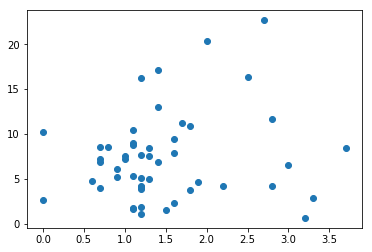

In [5]:
#matplotlib
plt.scatter(df['MAG'][:50], df['DEP'][:50]);

We lost the default axis labels that pandas gave us.   

Now change the [plot marker](https://matplotlib.org/api/markers_api.html).  We can add the `marker` option to either pandas' `DataFrame.plot` or matplotlib's `scatter`.  

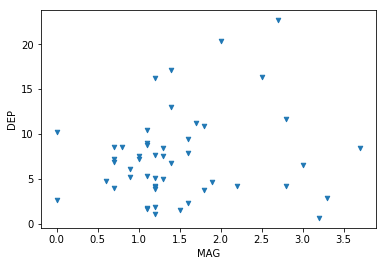

In [6]:
# pandas
df[:50].plot(x='MAG', y='DEP', kind="scatter", marker="v");

We can also change the marker size

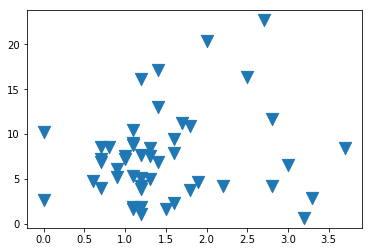

In [7]:
# matplotlib
plt.scatter(df['MAG'][:50], df['DEP'][:50], marker="v", s=150); 

Now make each marker size a function of the magnitude (not a great idea from a visualization perspective...but we'll do a better example next)

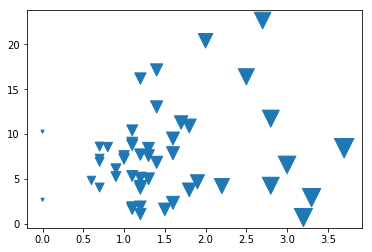

In [8]:
# matplotlib
plt.scatter(df['MAG'][:50], df['DEP'][:50], marker="v", s=[10+100*df['MAG'][:50]]);

## Colorbar legend

Make a subset of the data with only earthquakes of magnitude 5 or more

In [9]:
bigones = df[df['MAG'] >= 5]

Color markers by year of earthquake, add axis labels

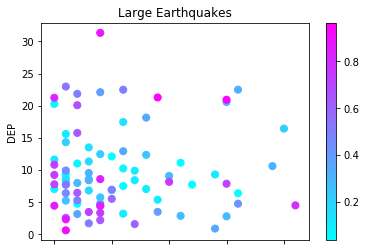

In [10]:
#pandas
bigones.plot(x='MAG', y='DEP', # data
                   kind='scatter', # type of plot
                   s=50, # marker size
                   cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
                   c=1.0*(bigones['YEAR']-1983)/28, # specific color for each point 
                                                     #(range between 0 and 1), 28 years of data
             title="Large Earthquakes");

Pandas gave us a default legend again, but the values aren't really meaningful; we want them to correspond to years. Pandas is great for easy defaults, but to control the legend more precisely, we turn to matplotlib directly.

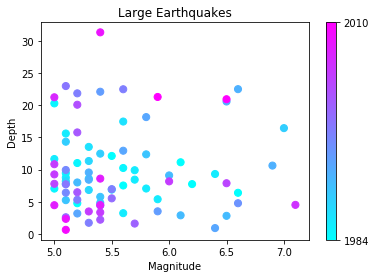

In [11]:
#matplotlib

# we'll save the output from the plot call so we can use the data later for a legend
pts = plt.scatter(bigones['MAG'], bigones['DEP'], # data
            s=50, # marker size
            cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
            c=1.0*(bigones['YEAR']-1983)/28) # specific color for each point (range between 0 and 1)
plt.ylabel("Depth")
plt.xlabel("Magnitude")
plt.title("Large Earthquakes")
clrbar = plt.colorbar(pts, ticks=[1.0/28, 27.0/28]) # data takes values from 1984=1/28, 2010=27/28 (none in 2011)
clrbar.ax.set_yticklabels(['1984', '2010']); # semicolon only needed after final command in cell 
                                             # to suppress printing the object type

## Working with Dates, Aggregating

Make a proper date column (instead of the current multiple columns for each part of the date) in the data frame so that we can plot by date.  Setting the new date column as an index lets us group by month easily.

In [12]:
df['datetime'] = pd.to_datetime(df[df.columns[range(6)]]) ## first 6 columns are year, month, day, hour, min, sec
df = df.set_index("datetime")

Plot number of earthquakes by month with a bar chart, limit to recent years (the last 48 observations are the last 4 years (4 years * 12 months)

In [13]:
counts = df.groupby(pd.TimeGrouper(freq='M')).count()['ID'][-48:] # do the aggregation
counts.head()

datetime
2008-01-31    1844
2008-02-29    1881
2008-03-31    2115
2008-04-30    2730
2008-05-31    2034
Freq: M, Name: ID, dtype: int64

When we plot this time, we'll need the axes, so we'll use `plt.subplots()` to have it returned.  `plt.subplots()` is a convenience function that returns both figure and axes, instead of doing:

```
fig = plt.figure(figsize=(10, 3.5))
ax = plt.subplot(1,1,1) # or plt.subplot(111) is equivalent
```

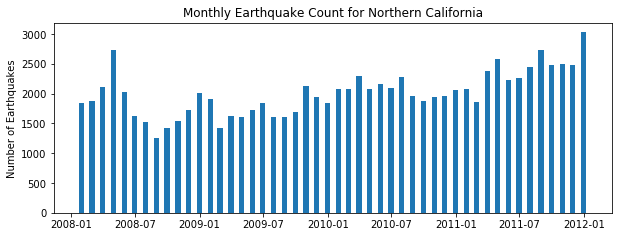

In [14]:
# matplotlib
fig, ax = plt.subplots(figsize=(10, 3.5)) # specify a plot size, use subplots to get axes because we'll need it later
plt.bar(counts.index, counts, width=15) # if we don't set the bar width, some bars might not be visible with this many
ax.xaxis_date()
plt.title("Monthly Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes");

We could also plot the `counts` object directly:

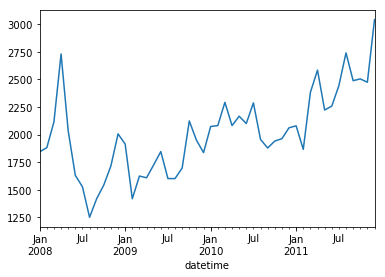

In [15]:
#pandas
counts.plot();

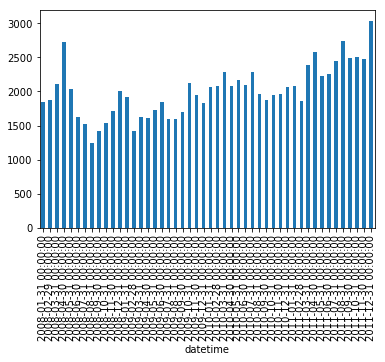

In [16]:
#pandas 
counts.plot(kind="bar");

Plot hourly earthquakes on a busy day

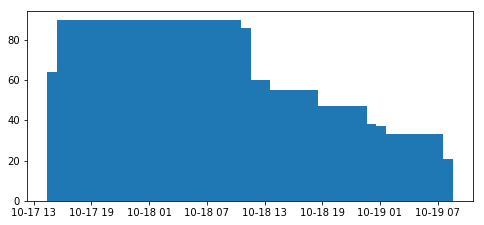

In [17]:
#matplotlib
df['date'] = pd.to_datetime(df[df.columns[range(3)]])
counts_hourly = df[df['date'] == dt.datetime(1989, 10, 18).date()].resample('1H').count()['ID'] 
# ID above is just to choose a single column
plt.subplots(figsize=(8, 3.5))
plt.bar(counts_hourly.index, counts_hourly);

Hmm, that doesn't look too good.  Fix it.  While we're at it, change the color and bar alignment.  And format the times to be just the hour.

This time, will use the figure, then subplot method, instead of using the subplots function.

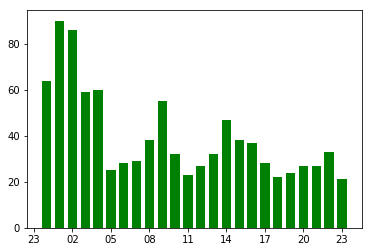

In [18]:
#matplotlib
fig = plt.figure() # just a different way to do it
ax = fig.add_subplot(111) ## saying that there's only one main plot being added to this figure
plt.bar(counts_hourly.index, counts_hourly, width=.03, color='g', align='center')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H'))

Looking better, but we can make it nicer

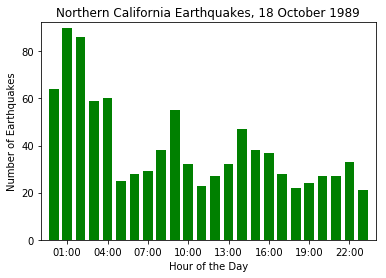

In [19]:
#matplotlib
fig, ax = plt.subplots() ## in one line instead of two above, just to show this
plt.bar(counts_hourly.index, counts_hourly, width=.03, color='g', align='center')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:00'))
#plt.ylim(0, 95) ## could modify ylim manually, but below works even if data changes
ax.margins(0.025) ## control extra space at beginning and end of x-axis
plt.title("Northern California Earthquakes, 18 October 1989")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Earthquakes");

Save our plot

In [20]:
plt.savefig("plot1.pdf")

## Layered Plots

More on markers and legends; generate some random values with `randn` and make a histogram.  Add the theoretical distirbution line above it

Info on named colors at https://matplotlib.org/examples/color/named_colors.html

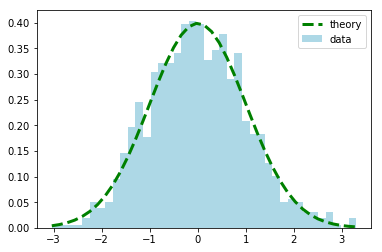

In [21]:
from scipy.stats import norm
from numpy.random import randn

# keep the values returned from calling the histogram plot to use with the legend and next plot
n, bins, patches = plt.hist(randn(1000), 40, normed=True, color="lightblue")

# add another plot on top of the histogram
# save the value here too so we can use it for the legend
l, = plt.plot(bins, norm.pdf(bins, 0.0, 1.0), 'g--', linewidth=3)
## comma above in l, means unpack the returned tuple to give you just the line object

plt.legend([l, patches[0]], ['theory', 'data']);

## Annotating Plots

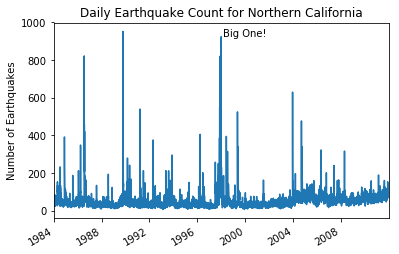

In [22]:
counts = df['date'].value_counts()
counts.plot() ## plot the Series directly
plt.title("Daily Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes")
plt.text(dt.datetime(1998,3,1), 925, "Big One!"); # use date to position on x-axis

Or with an arrow

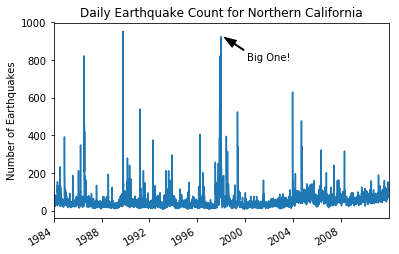

In [23]:
counts = df['date'].value_counts()
counts.plot() ## plot the Series directly
plt.title("Daily Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes")
plt.annotate("Big One!", xy=(dt.datetime(1998,3,1), 925),
             xytext=(dt.datetime(2000,3,1), 800),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1,
                             headwidth=8));

## Mathematical Functions

Let's make a plot like the following:

![mathplot](https://github.com/nuitrcs/pythonworkshops/raw/master/dataanalysis/visualization/mathfunction.png)

For math text used in the labels, see https://matplotlib.org/users/mathtext.html

In [24]:
import numpy as np

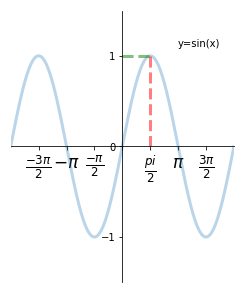

In [25]:
# create empty plot
fig = plt.figure(figsize=(4, 5))
ax = fig.add_subplot(111)

# generate data
x = np.arange(-2*np.pi, 2*np.pi, 0.01)
y = np.sin(x)

# deal with bounding box 
# lose top and right
# move bottom and left to the center like a mathematical graph
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the sin wave
ax.plot(x, y,linewidth=3, alpha=0.3)

# plot the reference lines
ax.plot([0, np.pi/2], [1, 1], ls="--", color="green", linewidth=3,alpha=0.5)
ax.plot([np.pi/2, np.pi/2], [1, 0], ls="--", color="red", linewidth=3,alpha=0.5)

# axis limits
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-1.5, 1.5)

# axis labels
xticker = np.arange(-np.pi-np.pi/2, np.pi+np.pi, np.pi/2)
xlabels = [r"$\frac{-3\pi}{2}$", r"${-\pi}$",r"$\frac{-\pi}{2}$","",r"$\frac{pi}{2}$",r"${\pi}$",r"$\frac{3\pi}{2}$"]

ax.set_xticks(xticker)
ax.set_xticklabels(xlabels, size=17)

yticker = np.arange(-1, 2, 1)
ax.set_yticks(yticker)

# annotation of function line
ax.text(np.pi, 1.1, "y=sin(x)");

## Subplots

We used the subplot function above, but not to create multiple plots.  Let's actually make more than one.  

The marker/line type specification shortcuts used below can be seen at https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

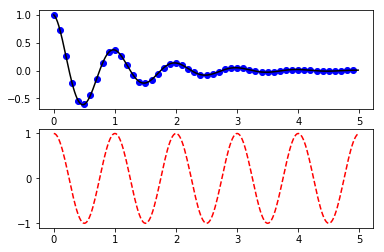

In [26]:
# function and arrays to generate some data
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# create a figure
plt.figure(1)
plt.subplot(211) # 211 = 2 rows, 1 column, first plot
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k') # bo = blue, o marker

plt.subplot(212) # 212 = 2 rows, 1 column, second plot
plt.plot(t2, np.cos(2*np.pi*t2), 'r--'); # r-- = red, dashed line

## Styling

You can change the default style of matplotlib plots.  A list of available styles:

In [27]:
print(matplotlib.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


And you can see a gallery of what plots look like in the styles at https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

To just affect a single plot, with `with`

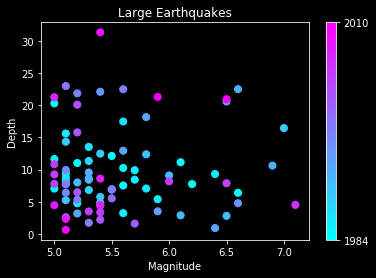

In [28]:
with plt.style.context(('dark_background')):
    pts = plt.scatter(bigones['MAG'], bigones['DEP'], # data
            s=50, # marker size
            cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
            c=1.0*(bigones['YEAR']-1983)/28) # specific color for each point (range between 0 and 1)
    plt.ylabel("Depth")
    plt.xlabel("Magnitude")
    plt.title("Large Earthquakes")
    clrbar = plt.colorbar(pts, ticks=[1.0/28, 27.0/28]) # data takes values from 1983=1/28, 2010=27/28 (none in 2011)
    clrbar.ax.set_yticklabels(['1984', '2010'])

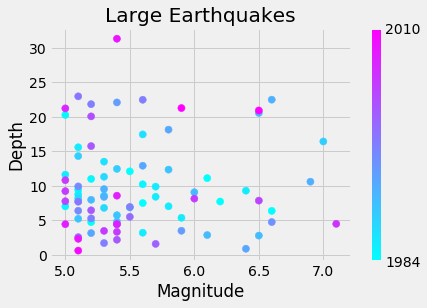

In [29]:
with plt.style.context(('fivethirtyeight')):
    pts = plt.scatter(bigones['MAG'], bigones['DEP'], # data
            s=50, # marker size
            cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
            c=1.0*(bigones['YEAR']-1983)/28) # specific color for each point (range between 0 and 1)
    plt.ylabel("Depth")
    plt.xlabel("Magnitude")
    plt.title("Large Earthquakes")
    clrbar = plt.colorbar(pts, ticks=[1.0/28, 27.0/28]) # data takes values from 1983=1/28, 2010=27/28 (none in 2011)
    clrbar.ax.set_yticklabels(['1984', '2010'])

You can also write your own styles: https://matplotlib.org/users/style_sheets.html

## Interactive Plots

Above we turned off the interactive plots in the notebook.  Let's turn them back on to see what they do.

<IPython.core.display.Javascript object>


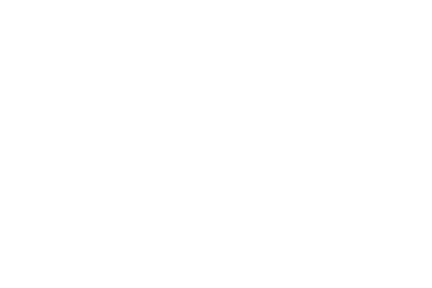

<IPython.core.display.Javascript object>


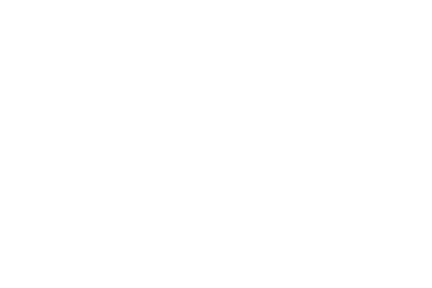

In [30]:
%matplotlib notebook
plt.figure()
pts = plt.scatter(bigones['MAG'], bigones['DEP'], # data
        s=50, # marker size
        cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
        c=1.0*(bigones['YEAR']-1983)/28) # specific color for each point (range between 0 and 1)
plt.ylabel("Depth")
plt.xlabel("Magnitude")
plt.title("Large Earthquakes")
clrbar = plt.colorbar(pts, ticks=[1.0/28, 27.0/28]) # data takes values from 1983=1/28, 2010=27/28 (none in 2011)
clrbar.ax.set_yticklabels(['1984', '2010']);

And now turn it back off:

In [31]:
%matplotlib inline

## Image Data

Plot a MRI image, change the [color map](https://matplotlib.org/examples/color/colormaps_reference.html); [source](https://matplotlib.org/examples/pylab_examples/mri_demo.html)

[Colormap creation tool](http://jdherman.github.io/colormap/)

In [50]:
import matplotlib.cbook as cbook # for the data
import matplotlib.cm as cm # for color map

(-0.5, 255.5, 255.5, -0.5)

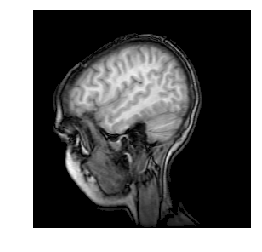

In [33]:
fig, ax = plt.subplots(num="MRI_demo")

# Data are 256x256 16 bit integers
dfile = cbook.get_sample_data('s1045.ima.gz')
im = np.fromstring(dfile.read(), np.uint16).astype(float)
im.shape = (256, 256)
dfile.close()

ax.imshow(im, cmap=cm.gray)
ax.axis('off')

(-0.5, 255.5, 255.5, -0.5)

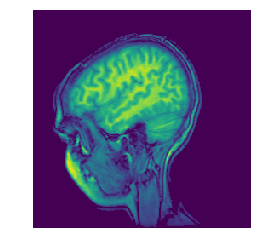

In [34]:
fig, ax = plt.subplots(num="MRI_demo")
ax.imshow(im, cmap=cm.viridis)
ax.axis('off')

In [51]:
c = np.matrix('0,0,0; 0,0,0; 0,1,1; 0,1,1; 0,1,1; 0,1,2; 0,2,2; 0,2,2; 0,2,3; 0,2,3; 0,3,3; 0,3,4; 0,3,4; 0,3,4; 0,4,5; 0,4,5; 0,4,5; 0,4,6; 0,5,6; 0,5,6; 0,5,7; 0,5,7; 0,6,7; 0,6,8; 0,6,8; 0,6,8; 0,7,9; 0,7,9; 0,7,10; 0,7,10; 0,8,10; 0,8,11; 0,8,11; 0,8,11; 0,9,12; 0,9,12; 0,9,12; 0,9,13; 0,10,13; 0,10,13; 0,10,14; 0,10,14; 0,11,14; 0,11,15; 0,11,15; 0,11,15; 0,12,16; 0,12,16; 0,12,16; 0,12,17; 0,13,17; 0,13,17; 0,13,18; 0,13,18; 0,14,18; 0,14,19; 0,14,19; 0,15,19; 0,15,20; 0,15,20; 0,15,20; 0,16,21; 0,16,21; 0,16,21; 0,16,22; 1,17,23; 1,18,24; 1,19,25; 2,20,26; 2,21,27; 3,22,28; 3,23,29; 4,23,30; 4,24,31; 4,25,32; 5,26,33; 5,27,34; 6,28,35; 6,29,36; 6,30,37; 7,30,38; 7,31,39; 8,32,40; 8,33,41; 9,34,42; 9,35,44; 9,36,45; 10,37,46; 10,37,47; 11,38,48; 11,39,49; 12,40,50; 12,41,51; 12,42,52; 13,43,53; 13,44,54; 14,44,55; 14,45,56; 15,46,57; 15,47,58; 15,48,59; 16,49,60; 16,50,61; 17,50,62; 17,51,63; 17,52,64; 18,53,65; 18,54,66; 19,55,67; 19,56,68; 20,57,69; 20,57,70; 20,58,71; 21,59,72; 21,60,73; 22,61,74; 22,62,75; 23,63,77; 23,64,78; 23,64,79; 24,65,80; 24,66,81; 25,67,82; 25,68,83; 26,69,84; 26,70,85; 26,71,86; 27,71,87; 28,72,88; 29,74,89; 31,75,90; 32,76,91; 34,77,92; 35,78,93; 37,80,93; 38,81,94; 40,82,95; 41,83,96; 43,84,97; 44,86,98; 46,87,99; 48,88,100; 49,89,101; 51,90,102; 52,91,103; 54,93,104; 55,94,105; 57,95,106; 58,96,107; 60,97,108; 61,99,109; 63,100,110; 64,101,110; 66,102,111; 67,103,112; 69,105,113; 70,106,114; 72,107,115; 73,108,116; 75,109,117; 76,110,118; 78,112,119; 79,113,120; 81,114,121; 82,115,122; 84,116,123; 85,118,124; 87,119,125; 88,120,126; 90,121,127; 91,122,128; 93,124,128; 94,125,129; 96,126,130; 98,127,131; 99,128,132; 101,129,133; 102,131,134; 104,132,135; 105,133,136; 107,134,137; 108,135,138; 110,137,139; 111,138,140; 113,139,141; 114,140,142; 116,141,143; 117,143,144; 119,144,145; 120,145,145; 122,146,146; 123,147,147; 125,149,148; 127,151,148; 129,152,148; 131,154,149; 133,156,149; 135,157,149; 138,159,149; 140,161,150; 142,162,150; 144,164,150; 146,166,150; 148,167,151; 150,169,151; 152,171,151; 154,172,151; 156,174,152; 158,176,152; 160,177,152; 162,179,152; 164,181,153; 166,183,153; 168,184,153; 171,186,153; 173,188,154; 175,189,154; 177,191,154; 179,193,154; 181,194,155; 183,196,155; 185,198,155; 187,199,155; 189,201,156; 191,203,156; 193,204,156; 195,206,156; 197,208,157; 199,210,157; 201,211,157; 203,213,157; 206,215,158; 208,216,158; 210,218,158; 212,220,158; 214,221,159; 216,223,159; 218,225,159; 220,226,159; 222,228,160; 224,230,160; 226,231,160; 228,233,161; 230,235,161; 232,236,161; 234,238,161; 236,240,162; 239,242,162; 241,243,162; 243,245,162; 245,247,163; 247,248,163; 249,250,163; 251,252,163; 253,253,164; 255,255,164')
cmp = matplotlib.colors.ListedColormap(c/255.0)

(-0.5, 255.5, 255.5, -0.5)

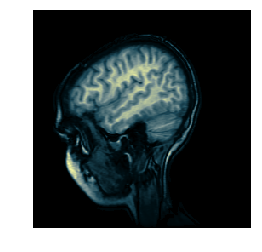

In [52]:
fig, ax = plt.subplots(num="MRI_demo")
ax.imshow(im, cmap=cmp)
ax.axis('off')

## 3D Surfaces

[mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/index.html) if for 3D plotting.  [Example source](https://matplotlib.org/examples/mplot3d/custom_shaded_3d_surface.html)

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

filename = cbook.get_sample_data('jacksboro_fault_dem.npz', asfileobj=False) #data
with np.load(filename) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

print(x.shape)

(45, 45)


<IPython.core.display.Javascript object>


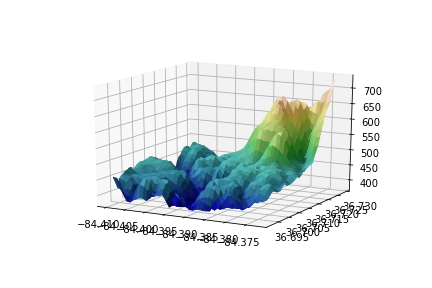

In [65]:
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft') # make colors
surf = ax.plot_surface(x, y, z, # 2D arrays of data
                       rstride=1, # row step
                       cstride=1, # column step
                       facecolors=rgb, #the shade from above
                       shade=False) # because we already computed what we wanted

In [66]:
%matplotlib inline

# [Seaborn](https://seaborn.pydata.org)
----

[Seaborn](https://seaborn.pydata.org) is one option moving beyond the basic plots.  It's focus is statistical visualization.

Seaborn is not part of the Anaconda distribution, so you'll need to install it.  Copy the command below into a new cell and run it (only the first time you need to use it):

```
!pip3 install seaborn
```

Note that if you're running multiple versions of Python on your system, you might need to install the package from the command line instead into the correct environment.  Via the terminal, if you're using Anaconda, use `conda install seaborn`.

In [ ]:
import seaborn as sns

Re-do a plot from above to see styling change

From before:
![matplotlibversion](https://github.com/nuitrcs/pythonworkshops/raw/master/dataanalysis/visualization/mplcompplot.png)

In [ ]:
sns.set() # turn on Seaborn default style

fig, ax = plt.subplots() ## in one line instead of two above, just to show this
plt.bar(counts_hourly.index, counts_hourly, width=.03, color='g', align='center')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:00'))
#plt.ylim(0, 95) ## could modify ylim manually, but below works even if data changes
ax.margins(0.025) ## control extra space at beginning and end of x-axis
plt.title("Northern California Earthquakes, 18 October 1989")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Earthquakes");

Above, the background and grid are different, the font is different, and tick marks and scaling are different from matplotlib defaults.

Other styles/themes are available: https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles

Seaborn also does have nice color palettes built in: http://seaborn.pydata.org/tutorial/color_palettes.html

Note that if you just want styling, some Seaborn styles are now available directly through matplotlib styles like we used above.

But Seaborn is more than styles.  Seaborn also adds some plot types that build on some summary statistics it can compute on data.

## Density/Bivariate Distribution Plots

When we have a lot of data, scatter plots can get difficult to read.  Let's do a density plot instead to explore a bivariate distribution.  Seaborn has several options, both for the density plot and supplementary plots along the axes.  http://seaborn.pydata.org/tutorial/distributions.html#plotting-bivariate-distributions

In [ ]:
with sns.axes_style("white"): #using a different style than the default
    sns.jointplot(x=df['MAG'][:1000], y=df['DEP'][:1000], kind="hex", color="k"); # color k is black

`jointplot` takes care of the overall plot.  If you want more control over the core and axes plots, you can add a density plot and axes plots to an existing matplotlib figure.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df['MAG'][:1000], df['DEP'][:1000], ax=ax)
sns.rugplot(df['MAG'][:1000], color="g", ax=ax)
sns.rugplot(df['DEP'][:1000], vertical=True, ax=ax);

## Regression and Trend Lines

Seaborn has many functions for visualizing linear relationships and even interaction effect between (or conditional effects of) variables: http://seaborn.pydata.org/tutorial/regression.html

First, a standard regression plot

In [ ]:
sns.regplot(x="MAG", y="DEP", data=df[:1000]);

This includes a 95% confidence interval on the slope coefficient in the plot by default (you can turn it off with the `ci` parameter).  We can also plot the residuals (errors) from a regression to check fit and adherence to model assumptions:  

In [ ]:
sns.residplot("MAG","DEP", df[:1000]);

There are further options for variations like polynomial fits, logistic regression, loess smoothing, and robust regression (eliminates/down-weights outliers).

In addition to `regplot`, there's also the slightly more powerful `lmplot` that let's us condition the slope and intercept on a third variable.

In [ ]:
df['north'] = df['LAT'] > 38 # create a new variable to divide earthquakes by latitude
sns.lmplot(x="MAG", y="DEP", hue="north", data=df.sample(500));